Dataset Preview:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


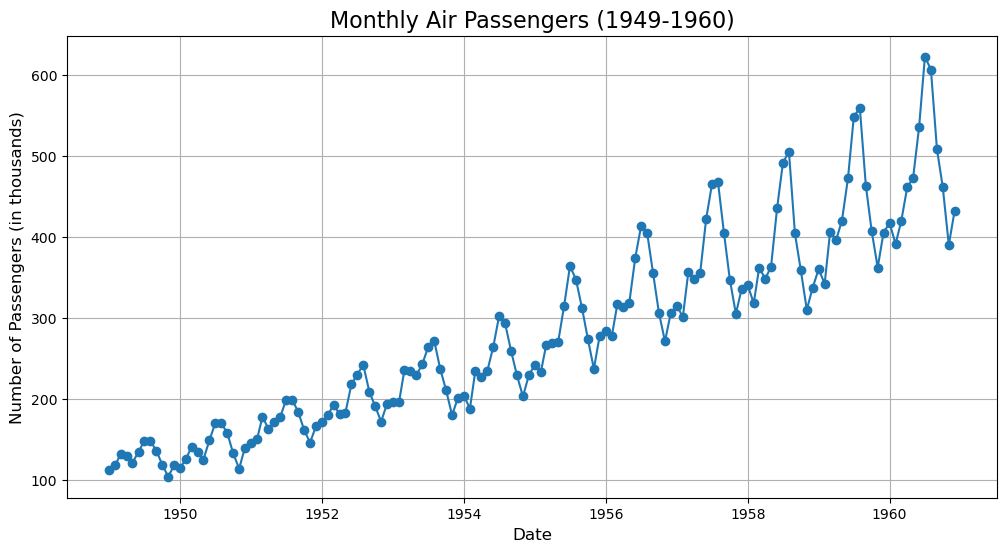

In [24]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "C:/Users/HDC0422272/Downloads/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print("Dataset Preview:")
print(data.head())

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], marker='o', linestyle='-')
plt.title('Monthly Air Passengers (1949-1960)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Passengers (in thousands)', fontsize=12)
plt.grid()
plt.show()





Checking for missing values:
Passengers        0
Passengers_MA    11
dtype: int64

Preprocessed Data (First 5 Rows):
            Passengers  Passengers_MA  Passengers_Normalized
Month                                                       
1949-01-01         112            NaN               0.015444
1949-02-01         118            NaN               0.027027
1949-03-01         132            NaN               0.054054
1949-04-01         129            NaN               0.048263
1949-05-01         121            NaN               0.032819


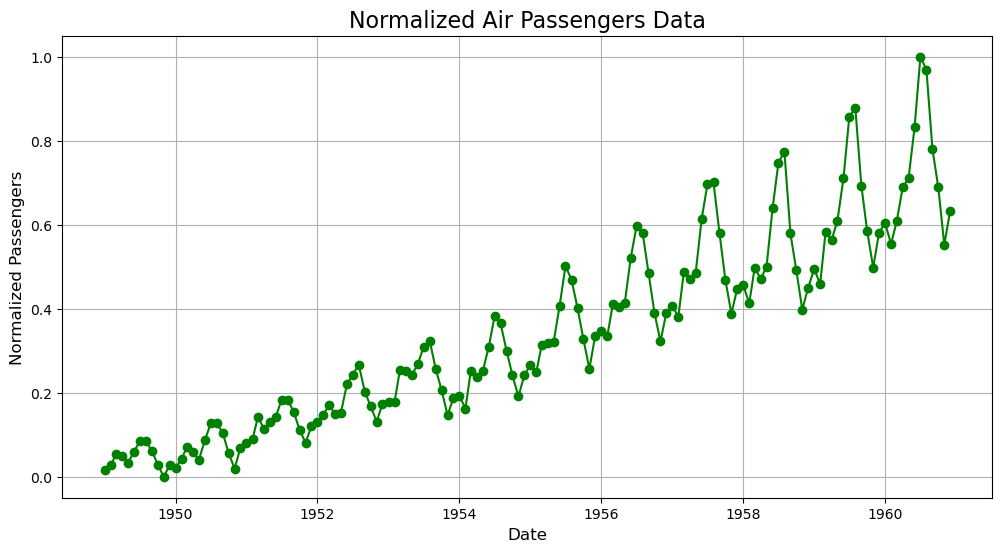

In [13]:
# Import required libraries
from sklearn.preprocessing import MinMaxScaler

# Check for missing values
print("Checking for missing values:")
print(data.isnull().sum())

# Handle missing values (if any) - Filling with forward fill as an example
data['Passengers'] = data['Passengers'].fillna(method='ffill')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers_Normalized'] = scaler.fit_transform(data[['Passengers']])

# Display the preprocessed data
print("\nPreprocessed Data (First 5 Rows):")
print(data.head())

# Visualize the normalized data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers_Normalized'], color='green', linestyle='-', marker='o')
plt.title('Normalized Air Passengers Data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Passengers', fontsize=12)
plt.grid()
plt.show()


In [18]:
# Import required libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the dataset into training and testing sets
train_size = int(len(data) * 0.8)  # 80% training, 20% testing
train, test = data['Passengers'][:train_size], data['Passengers'][train_size:]

# Fit the ARIMA model (parameters can be tuned for better performance)
model = ARIMA(train, order=(2, 1, 2))  # ARIMA(p, d, q)
arima_model = model.fit()

# Forecast on the test data
forecast = arima_model.forecast(steps=len(test))
forecast_index = test.index

# Evaluate model performance
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")


Mean Squared Error (MSE): 6808.397036193119
Root Mean Squared Error (RMSE): 82.51301131453826


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model Performance Metrics:
Mean Absolute Error (MAE): 63.54531128529889
Mean Squared Error (MSE): 6808.397036193119
Root Mean Squared Error (RMSE): 82.51301131453826
R-squared (R2): -0.11530974013365625


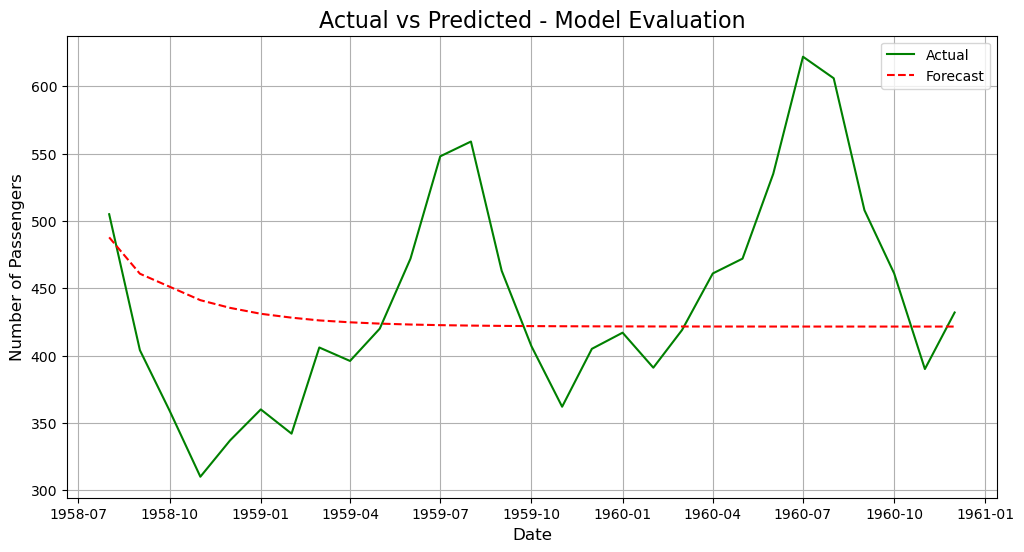

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate performance metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

# Print the metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Visualize Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Actual vs Predicted - Model Evaluation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

# Print accuracy metrics
print("Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Convert MAE to percentage for interpretability
mean_test_value = test.mean()
mae_percentage = (mae / mean_test_value) * 100
print(f"Mean Absolute Error (as percentage of mean): {mae_percentage:.2f}%")


Model Accuracy Metrics:
Mean Absolute Error (MAE): 63.54531128529889
Mean Squared Error (MSE): 6808.397036193119
Root Mean Squared Error (RMSE): 82.51301131453826
R-squared (R²): -0.11530974013365625
Mean Absolute Error (as percentage of mean): 14.43%


In [17]:
# Define a function to calculate MAPE and Accuracy
def calculate_accuracy(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    accuracy = 100 - mape
    return accuracy

# Calculate the accuracy percentage
accuracy_percentage = calculate_accuracy(test, forecast)
print(f"Model Accuracy: {accuracy_percentage:.2f}%")


Model Accuracy: 85.78%
